In [62]:
import pandas as pd

path = 'datasets/reddit/'
# Creating key, values for each event
files = {
    'qatar_world_cup.csv': {'event': 'World Cup', 'year': 2022},
    'russia_world_cup.csv': {'event': 'World Cup', 'year': 2018},
    'paris_olympics.csv': {'event': 'Olympics', 'year': 2024},
    'tokyo_olympics.csv': {'event': 'Olympics', 'year': 2021} 
}

dfs = []
for file, meta in files.items():
    df = pd.read_csv(path + file)
    df['event'] = meta['event']
    df['year'] = meta['year']
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)
print("Combined shape:", df.shape)
df.head()


Combined shape: (39996, 10)


,id,parent_id,text,author,views,score,upvote_ratio,datetime,event,year
0,zp43wc,NaN,Argentina have won their third World Cup title...,HancokUndead,NaN,50379,0.94,2022-12-18 17:54:53,World Cup,2022
1,j0qjl9y,t3_zp43wc,The best final of all times?,2soccer2bot,NaN,1,1.00,2022-12-18 17:58:24,World Cup,2022
2,j0qjwse,t3_zp43wc,"This game will be talked about for decades, an...",Whereishumhum-,NaN,2719,2719.00,2022-12-18 18:00:11,World Cup,2022
3,j0qj68w,t3_zp43wc,[deleted],NaN,NaN,3624,3624.00,2022-12-18 17:55:58,World Cup,2022
4,j0qtiow,t3_zp43wc,"Any way you spin it, no matter who you support...",Mosh83,NaN,1029,1029.00,2022-12-18 18:56:37,World Cup,2022


In [64]:
# Save dataset before cleaning if needed later
df_combined = df.copy() 
df_combined.to_csv('datasets/reddit_combined.csv', index=False)
print("Combined raw dataset saved to: datasets/reddit_combined.csv")

Combined raw dataset saved to: datasets/reddit_combined.csv


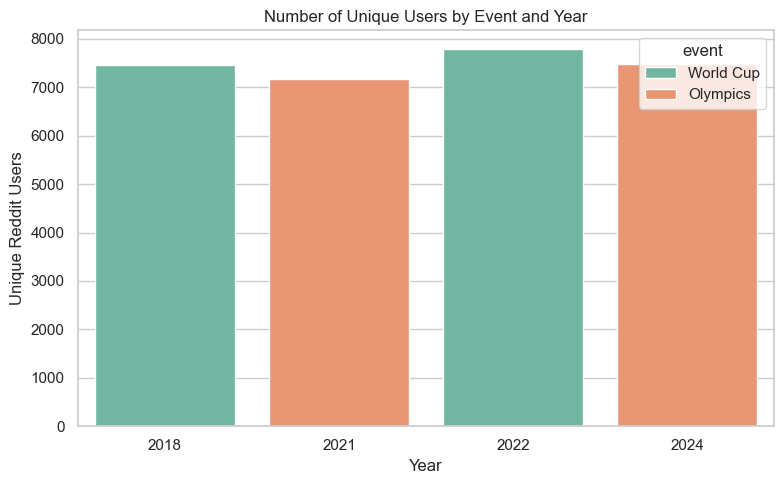

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Unique Users by Event and Year
sns.set(style="whitegrid")
user_count = df.groupby(['event', 'year'])['author'].nunique().reset_index()
user_count.columns = ['event', 'year', 'unique_users']

plt.figure(figsize=(8, 5))
sns.barplot(data=user_count, x='year', y='unique_users', hue='event', palette='Set2')
plt.title("Number of Unique Users by Event and Year")
plt.xlabel("Year")
plt.ylabel("Unique Reddit Users")
plt.tight_layout()
plt.show()

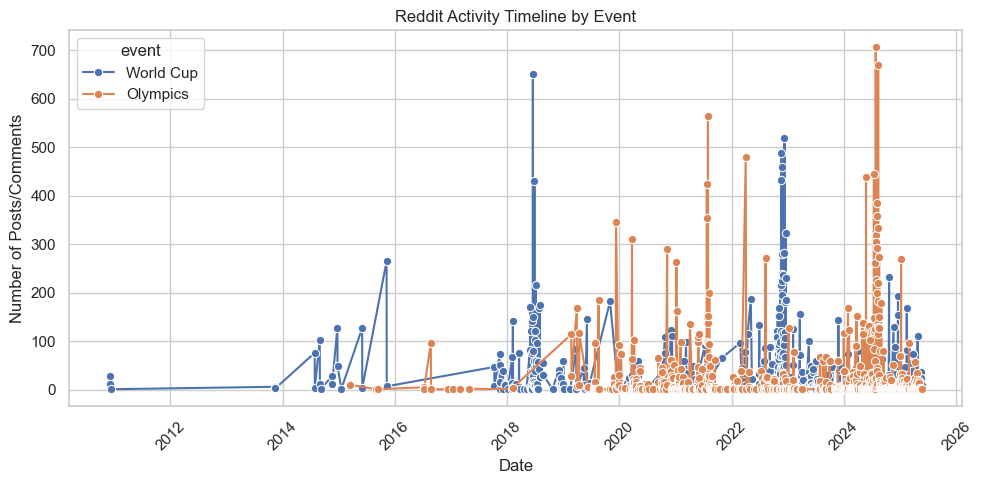

In [68]:
# Activity Timeline by Event
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df['date'] = df['datetime'].dt.date

activity_by_date = df.groupby(['date', 'event']).size().reset_index(name='count')
plt.figure(figsize=(10, 5))
sns.lineplot(data=activity_by_date, x='date', y='count', hue='event', marker='o')
plt.title("Reddit Activity Timeline by Event")
plt.xlabel("Date")
plt.ylabel("Number of Posts/Comments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [69]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
import re
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
tokenizer = TweetTokenizer()
lemmatizer = WordNetLemmatizer()

# Cleaning function
def clean_text(text):
    if not isinstance(text, str):
        return ''
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", '', text)  
    text = re.sub(r"[^a-zA-Z\s]", '', text)    
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t not in stop_words and len(t) > 2]
    return ' '.join(tokens)

# Apply to dataset
df['clean_text'] = df['text'].apply(clean_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/harrietmathew/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/harrietmathew/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [71]:
df[['text', 'clean_text']].sample(5)

,text,clean_text
16707,Am I just biased or did Firmino look a lot bet...,biased firmino look lot better jesus minute
22096,Ever since I first saw this I’ve been thinking...,ever since first saw ive thinking intense pres...
15409,Proofreading ...,proofreading
16619,It’s annoying that people treat the most prest...,annoying people treat prestigious trophy footb...
39923,"Ah, the yearly « I got framed into a cheating ...",yearly got framed cheating scandal made life t...


In [72]:
# Save full DataFrame with cleaned text and metadata
df.to_csv('datasets/reddit_cleaned.csv', index=False)
print("Preprocessed dataset saved to: datasets/reddit_cleaned.csv")

Preprocessed dataset saved to: datasets/reddit_cleaned.csv
